# Run YOLO V3 on Colab for images/videos

Hello there,
Today, we will be discussing how can we use the Darknet project on Google Colab platform. For those who are not familiar with these terms:

- The Darknet project is an open-source written in C, which is a framework to develop deep neural networks.
- Yolo V3 is an object detection algorithm. It is one of the state of the art solution when **accuracy/processing power needed** metric is considered.
- Google Cola is a cloud-based data science workspace similar to the jupyter notebook. Each Collabrotary session is equipped with a virtual machine running 13 GB of ram and either a CPU, GPU, or TPU processor. In most case, all the required packages are already installed on these machines and you can quite easily start development using Google Collaboratory. It saves us from installing process and it provides us **easy to accessible GPU's** which is also **free** under some constraints.

Have a look Ted Talk by Joseph Redmon the developer of the darknet project. The talk is about Darknet and YOLO projects which titled as “How computers learn to recognize objects instantly” . Darknet project aims to create a new neural network framework which is completely focused on simplicity and performance. The thing which I like about is its clarity and performance. All the code is written in C, to define a deep learning network you should only create a config file which defines the layers. By this way, it does not lose its performance capabilities also it provides us easy to use interface for development with this library.

Since I love both YOLO project and Google Colab, I decided to create a tutorial to use them together. I create a GitHub repository and a Collaboratory notebook for this purpose

- [Colab Notebook](https://colab.research.google.com/drive/1DcXQ_pLtLVvQAwILZR-kF0ZJwhkp11Jl)
- [mozanunal/yoloOnGoogleColab](https://github.com/mozanunal/yoloOnGoogleColab)

{% youtube Cgxsv1riJhI%}

**Please check**
- [YOLO website](https://pjreddie.com/darknet/yolo/)
- [Darknet website](https://pjreddie.com/darknet/)
- [YOLOV3 Paper](https://arxiv.org/abs/1804.02767)



## Install
Go to the directory, clear and install everthing


*   Clone the project
*   Change make file configurations and make OPENCV and GPU enable
*   Install opencv library


In [1]:

import cv2, os
import matplotlib.pyplot as plt
%matplotlib inline
  

In [2]:

!ls
!cd /content
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!apt update
!apt-get install libopencv-dev

sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 14358, done.
remote: Total 14358 (delta 0), reused 0 (delta 0), pack-reused 14358
Receiving objects: 100% (14358/14358), 13.08 MiB | 24.43 MiB/s, done.
Resolving deltas: 100% (9764/9764), done.
/content/darknet
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://develope

## `Compile and Configure`


* Compile YOLO
* Download YOLO weights



In [3]:
!make &> compile.log


In [4]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-11-01 20:04:39--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   185KB/s    in 17m 47s 

2020-11-01 20:22:27 (227 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## Test An Image

In [6]:
def predictImage(imageDir):
  os.system("cd /content/darknet && ./darknet detect cfg/yolov3.cfg yolov3.weights {}".format(imageDir))
  image = cv2.imread("/content/darknet/predictions.jpg")
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [9]:
!pwd
!find -name predictions.jpg


/content/darknet


In [10]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
!ls

--2020-11-01 20:33:00--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg [following]
--2020-11-01 20:33:00--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68535 (67K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  66.93K  --.-KB/s    in 0.007s  

2020-11-01 20:33:00 (9.75 MB/s) - ‘test.jpg’ saved [68535/68535]

3rdparty	compile.log		image_yolov4.sh        READM

## Test with Video

--2020-11-01 20:47:25--  https://c7.alamy.com/comp/B54E0C/a-violinist-plays-to-drivers-in-the-tehran-traffic-local-caption-iran-B54E0C.jpg
Resolving c7.alamy.com (c7.alamy.com)... 13.32.207.37, 13.32.207.16, 13.32.207.107, ...
Connecting to c7.alamy.com (c7.alamy.com)|13.32.207.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘a-violinist-plays-to-drivers-in-the-tehran-traffic-local-caption-iran-B54E0C.jpg’

a-violinist-plays-t     [ <=>                ] 212.36K  --.-KB/s    in 0.07s   

Last-modified header invalid -- time-stamp ignored.
2020-11-01 20:47:25 (2.96 MB/s) - ‘a-violinist-plays-to-drivers-in-the-tehran-traffic-local-caption-iran-B54E0C.jpg’ saved [217459]



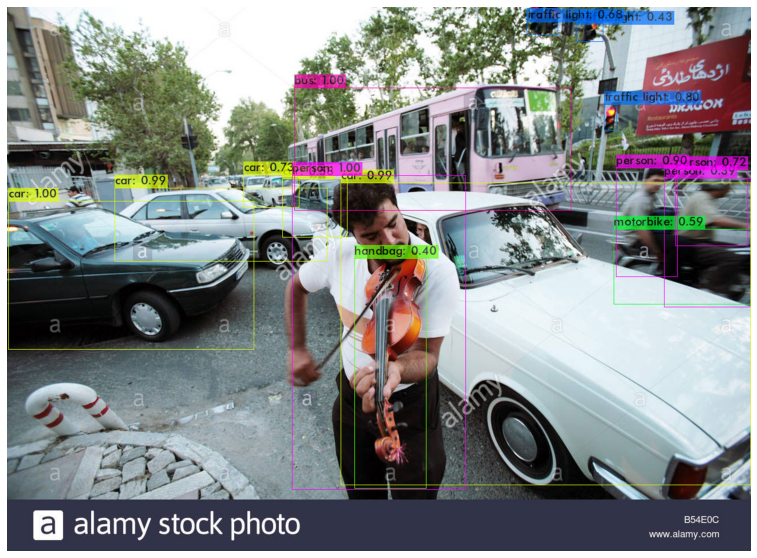

In [13]:
!wget https://c7.alamy.com/comp/B54E0C/a-violinist-plays-to-drivers-in-the-tehran-traffic-local-caption-iran-B54E0C.jpg
predictImage("a-violinist-plays-to-drivers-in-the-tehran-traffic-local-caption-iran-B54E0C.jpg")

--2020-11-01 20:36:37--  https://c7.alamy.com/comp/B54E02/day-long-traffic-jams-in-tehran-iran-local-caption-iran-B54E02.jpg
Resolving c7.alamy.com (c7.alamy.com)... 13.32.207.124, 13.32.207.107, 13.32.207.16, ...
Connecting to c7.alamy.com (c7.alamy.com)|13.32.207.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘day-long-traffic-jams-in-tehran-iran-local-caption-iran-B54E02.jpg’

day-long-traffic-ja     [ <=>                ] 239.67K  --.-KB/s    in 0.07s   

Last-modified header invalid -- time-stamp ignored.
2020-11-01 20:36:37 (3.52 MB/s) - ‘day-long-traffic-jams-in-tehran-iran-local-caption-iran-B54E02.jpg’ saved [245425]



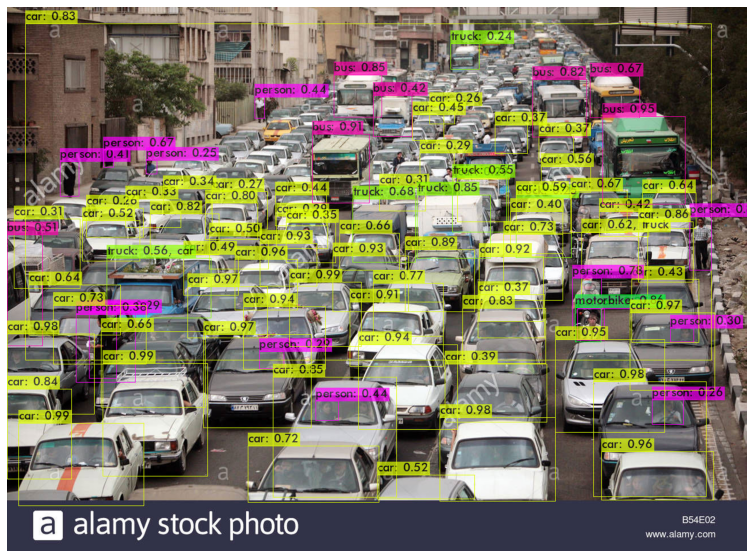

In [12]:
!wget https://c7.alamy.com/comp/B54E02/day-long-traffic-jams-in-tehran-iran-local-caption-iran-B54E02.jpg
predictImage("day-long-traffic-jams-in-tehran-iran-local-caption-iran-B54E02.jpg")

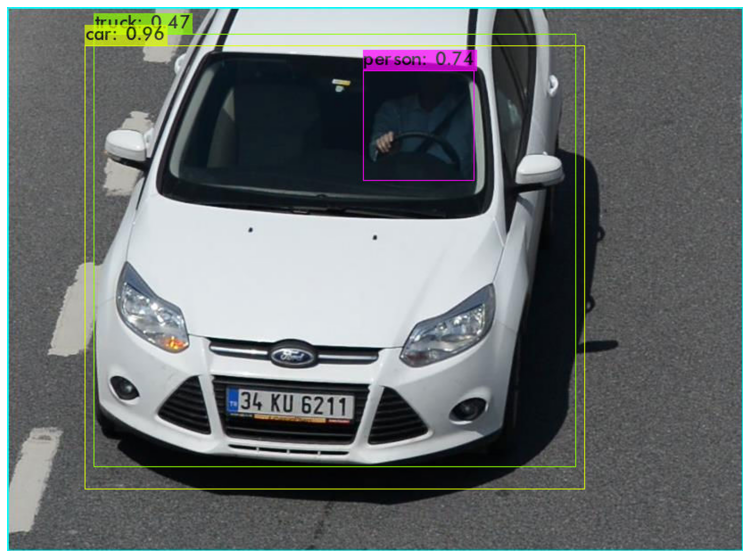

In [11]:
predictImage("test.jpg")



In [14]:
def predictVideo(videoDir):
  os.system(""" cd /content/darknet && ./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights \
  -dont_show {} -i 0 -out_filename res.avi
  """.format(videoDir))


In [15]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi
!ls

--2020-11-01 20:51:38--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.avi [following]
--2020-11-01 20:51:38--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.avi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15897530 (15M) [application/octet-stream]
Saving to: ‘test.avi’

test.avi            100%[===================>]  15.16M  --.-KB/s    in 0.1s    

2020-11-01 20:51:39 (124 MB/s) - ‘test.avi’ saved [15897530/15897530]

3rdparty
a-violinist-plays-t

In [16]:
predictVideo("test.avi")


In [17]:
!du -h res.avi

93M	res.avi


In [18]:
from google.colab import files

files.download('/content/darknet/res.avi')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>